# Spot the Mask Challenge
## Introduction
### Background
WHO, CDC and GOK have all advised that wearing masks can slow the spread of Corona virus by reducing community transmission and touching of face.
In Kenya, wearing of masks in public spaces is mandatory. AI solutions can simply human surveillance efforts needed to ensure compliance

### Objective
Create an image classification ML model to accurately predict the likelihood that an image contains a person wearing a face mask, or not

### Data
- 1300 training images and corresponding train_labels.csv which contains image and whether 1(mask) and 0(no mask)

- 509 test images


### Benefits
ML solution will help policymakers, law enforcement, hospitals and commercial businesses ensure that masks are being worn appropriately in public

## Import Libraries

In [ ]:
#read images
import os
import shutil
from skimage import io
#read image csv files
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile

# Import google drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# Delete root mask images if it exists
if os.path.exists('/content/mask_images/'):
  shutil.rmtree('/content/mask_images/')

# Make directory into local colab. Unzip the files into the local colab directory
combined_images = '/content/mask_images/combined'
combined_images_unzipped = '/content/mask_images/combined/images/'
train_dir = '/content/mask_images/train/'
train_images_mask = '/content/mask_images/train/mask'
train_images_nomask = '/content/mask_images/train/nomask'
test_images_path = '/content/mask_images/test/'
drive_path = '/content/gdrive/My Drive/Presentations & Projects/Image Classification/Spot The Mask/Data/'
model_path = '/content/gdrive/My Drive/Presentations & Projects/Image Classification/Spot The Mask/Model/'
data_to_import = 4 # 0 = Zindi, 1 = github, 2 = local, 3 = all , 4 = Zindi and Local

# Source: https://zindi.africa/competitions/zindiweekendz-learning-spot-the-mask-challenge/data
zindi_images = 'images.zip'
zindi_image_labels = 'train_labels.csv'

# Source: https://github.com/prajnasb/observations/tree/master/experiements/data
github_images = 'extra_mask_nomasks.zip'

# Source: https://github.com/prajnasb/observations/tree/master/experiements/data
pi_internet_images = 'local.zip'

os.makedirs(combined_images)
os.makedirs(train_images_mask)
os.makedirs(train_images_nomask)
os.makedirs(test_images_path)


def move_images(source_path, target_path):
  ''' Move files from one directory to another '''
  for item in os.listdir(source_path):
    shutil.move(os.path.join(source_path, item), os.path.join(target_path, item))
  print('Source:', source_path, 'Target:',target_path, ' Moved images count is ',len(os.listdir(target_path)))

# Import Zindi Images and corresponding csv with train image labels
if data_to_import in(0,3,4):
  with ZipFile(os.path.join(drive_path, zindi_images),"r") as zip_ref:
      zip_ref.extractall(combined_images)
  
  image_file_names = os.listdir(os.path.join(combined_images, 'images'))
  
  print("\nZindi images", len(image_file_names))

  # Copy training images from unzip directory to training directory
  train_images = pd.read_csv(os.path.join(drive_path, zindi_image_labels))

  for index, row in train_images.iterrows(): 
      src = combined_images_unzipped + row['image']
      if row['target'] == 1:
        dst = train_images_mask + '/'+row['image']
      else:
        dst = train_images_nomask +'/'+ row['image']
      shutil.move(src, dst)

  print(train_images_mask," count is ",len(os.listdir(train_images_mask)))
  print(train_images_nomask," count is ",len(os.listdir(train_images_nomask)))
  
  #Test images with no labels
  move_images(combined_images_unzipped, test_images_path)
  
  print(len(train_images))
  print(train_images.head(5))

# Import second batch of training images from github.
if data_to_import in(1,3):
  with ZipFile(os.path.join(drive_path, github_images),"r") as zip_ref:
      zip_ref.extractall(combined_images)
  
  image_file_names = os.listdir(os.path.join(combined_images, 'data','with_mask'))
  print("\nGithub images with mask", len(image_file_names))
  
  image_file_names = os.listdir(os.path.join(combined_images, 'data','without_mask'))
  print("\nGithub images without mask", len(image_file_names))
  
  move_images(os.path.join(combined_images, 'data','with_mask'), train_images_mask)
  move_images(os.path.join(combined_images, 'data','without_mask'), train_images_nomask)

# Import third batch of training images from pi and internet source of black men with and without masks
if data_to_import in(2,3,4):
  with ZipFile(os.path.join(drive_path, pi_internet_images),"r") as zip_ref:
      zip_ref.extractall(combined_images)
  
  image_file_names = os.listdir(os.path.join(combined_images, 'Local','with_mask'))
  print("\nLocal images with mask", len(image_file_names))
  
  image_file_names = os.listdir(os.path.join(combined_images, 'Local','with_no_mask'))
  print("\nLocal images without mask", len(image_file_names))
  
  move_images(os.path.join(combined_images, 'Local','with_mask'), train_images_mask)
  move_images(os.path.join(combined_images, 'Local','with_no_mask'), train_images_nomask)



Zindi images 1817
/content/mask_images/train/mask  count is  644
/content/mask_images/train/nomask  count is  664
Source: /content/mask_images/combined/images/ Target: /content/mask_images/test/  Moved images count is  509
1308
                                image  target
0  tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg       0
1  rxgismgsvmaayzjarbfjaljhqmpbrt.jpg       1
2  uuzshfrhkgrkolhwdvliqauzulurnz.jpg       0
3  mjspxsagzusaznvnyxgamtrlqkqklp.jpg       0
4  rlbmuajgezfiddjzlyeoupxpqubkpt.jpg       1

Local images with mask 34

Local images without mask 39
Source: /content/mask_images/combined/Local/with_mask Target: /content/mask_images/train/mask  Moved images count is  678
Source: /content/mask_images/combined/Local/with_no_mask Target: /content/mask_images/train/nomask  Moved images count is  703


## Data Exploration

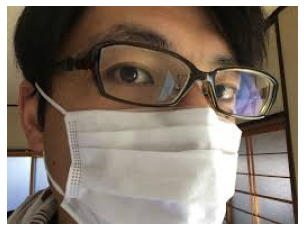

Size of this image is (194, 259, 3)
Image path is /content/mask_images/train/mask/rlavyoidildcmfmjxtuwmnrcsvcxtv.jpg


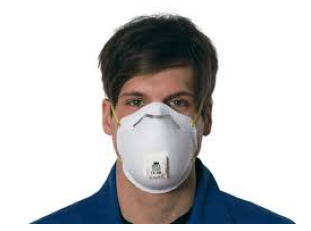

Size of this image is (192, 262, 3)
Image path is /content/mask_images/train/mask/jpewusgxdbannlsilpjpmslukrkgsa.jpg


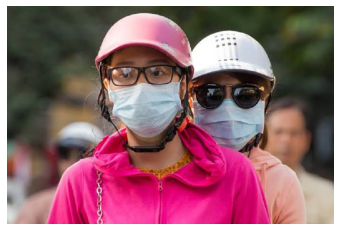

Size of this image is (583, 875, 3)
Image path is /content/mask_images/train/mask/dhehiouqegpspfnclnohhsebenkdoj.jpg


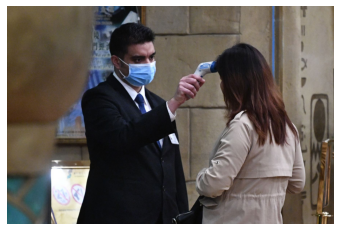

Size of this image is (1198, 1800, 3)
Image path is /content/mask_images/train/mask/wxnkpyvsxpcxhyfnnleacondpjnvlb.jpg


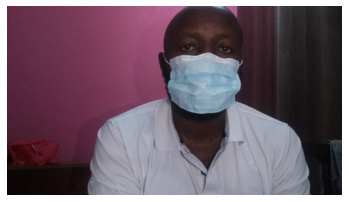

Size of this image is (720, 1280, 3)
Image path is /content/mask_images/train/mask/20201012_190451.jpg


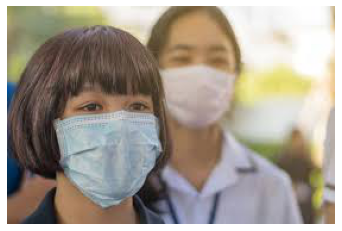

Size of this image is (183, 276, 3)
Image path is /content/mask_images/train/mask/zzpcszmvsjybewpvgdrrxuqghfgpef.jpg


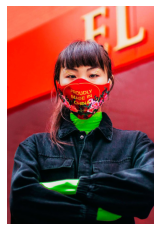

Size of this image is (949, 640, 3)
Image path is /content/mask_images/train/mask/kudirqrbnyrkjtlbrtlvqerreevrgp.jpg


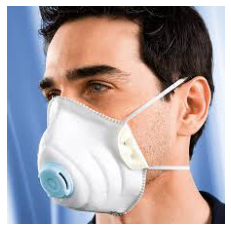

Size of this image is (224, 224, 3)
Image path is /content/mask_images/train/mask/xfpavtjcslgqpcodollaswowusfzcv.jpg


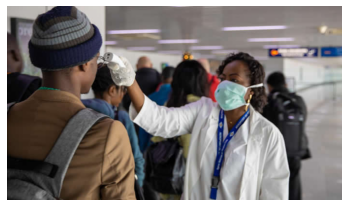

Size of this image is (399, 691, 3)
Image path is /content/mask_images/train/mask/dfdwmbjhcgucbnbsanowgrsgticryg.jpg


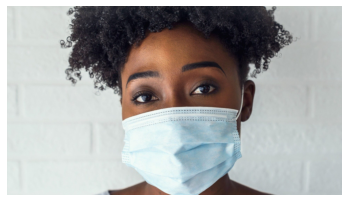

Size of this image is (491, 873, 3)
Image path is /content/mask_images/train/mask/fqoupwfhdrmccemzqoftmcsfqxmizt.jpg


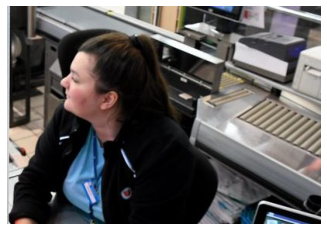

Size of this image is (281, 405, 3)
Image path is /content/mask_images/train/nomask/zoptssyykrqwylautftdjjbgujmiig.jpg


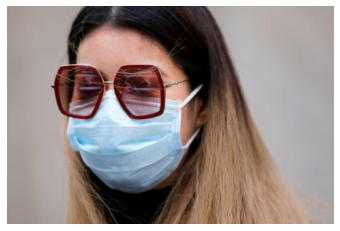

Size of this image is (320, 480, 3)
Image path is /content/mask_images/train/nomask/vszafuemtbxcbdkwiconlqqgehnpek.jpg


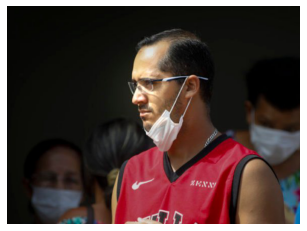

Size of this image is (429, 578, 3)
Image path is /content/mask_images/train/nomask/xwtdzqtqfgriqpxznfomajsoopfarv.jpg


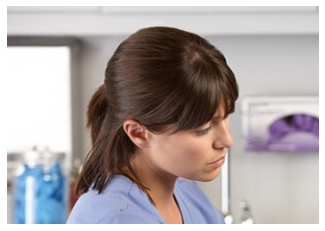

Size of this image is (253, 362, 3)
Image path is /content/mask_images/train/nomask/ntmeirfkhiktgyzyegesnlqrsgmbsf.jpg


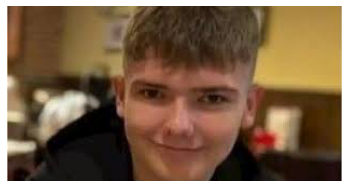

Size of this image is (162, 311, 3)
Image path is /content/mask_images/train/nomask/qrszgqeyvimvdknvmkexzzotmlhvoh.jpg


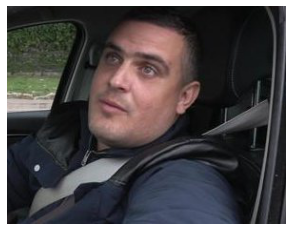

Size of this image is (229, 293, 3)
Image path is /content/mask_images/train/nomask/ecwyzrchdkydfhollnvgwqqafoccrb.jpeg


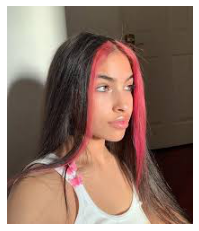

Size of this image is (243, 207, 3)
Image path is /content/mask_images/train/nomask/hhzjziuzpzjalbviclpbecvjqrclee.jpg


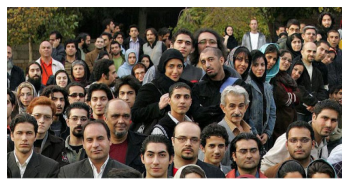

Size of this image is (263, 512, 3)
Image path is /content/mask_images/train/nomask/wqbxzcyqmqwpmwrzufwehothqavhtx.jpg


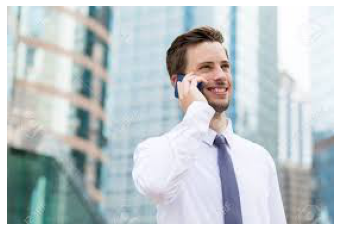

Size of this image is (183, 275, 3)
Image path is /content/mask_images/train/nomask/ucroyqowxzlrfrcjxzhobrmwbekttr.jpg


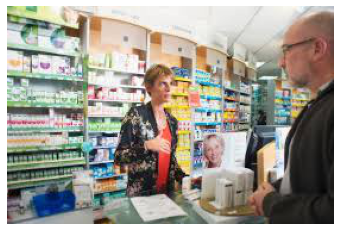

Size of this image is (183, 275, 3)
Image path is /content/mask_images/train/nomask/akyftmgsubfqvneoxaoclhwwvtfbjs.jpg


In [ ]:
#Function to upload and if need be resize the training images
def display_images(image_path):
    images = []
    labels = []
    file_names =[]
    image_file_names = [os.path.join(image_path, f) for f in os.listdir(image_path)]        
    # Read the images and load them into an array
    for file in image_file_names[0:10]:         
      image=io.imread(file) #io package from SKimage package
      images.append(np.array(image))
      file_names.append(file)
      
      #Display image
      plt.axis('off')
      plt.imshow(image)
      plt.show()
      print("Size of this image is " + str(image.shape))
      print("Image path is " + str(file))        
      # print("Image name is " + str(image_names[index]))   

    return images,  file_names #labels

# Mask
train_mask_matrix,file_names = display_images(train_images_mask)

#No Mask
train_nomask_matrix,file_names = display_images(train_images_nomask)

## Modeling

### Approach 3: Transfer Learning: Mobile Net V2
To reduce underfitting
- Increase model complexity using transfer learning
- Increase epochs
- Increase features (will increasing resolution help?)

In [ ]:
#from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Sequential,optimizers,layers,models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l2

BATCH_SIZE = 32 
VALIDATION_SPLIT = 0.2
BASE_LEARNING_RATE = 0.0001
IMAGE_SIZE = 224
IMAGE_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

datagen = ImageDataGenerator(validation_split=VALIDATION_SPLIT, 
                             rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

train_generator = datagen.flow_from_directory(train_dir, 
                                              target_size =(IMAGE_SIZE,IMAGE_SIZE),
                                              batch_size = BATCH_SIZE,
                                              class_mode='categorical',
                                              shuffle=True,
                                              subset='training')

val_generator = datagen.flow_from_directory(train_dir,
                                            target_size =(IMAGE_SIZE,IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode='categorical',
                                            shuffle=True,
                                            subset='validation')

Found 1106 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [ ]:
mobilenet_conv_base = MobileNetV2(input_shape=IMAGE_SHAPE,include_top=False,weights='imagenet')
mobilenet_conv_base.trainable = True

# How many layers are in the mobilenetv2 base model?
print("Number of layers in the base model: ", len(mobilenet_conv_base.layers))
mobilenet_conv_base.summary()

# Fine tune from this layer onwards and freeze all the layers before the `fine_tune_at` layer
fine_tune_at = 100
for layer in mobilenet_conv_base.layers[:fine_tune_at]:
    layer.trainable = False

## Optimizing the model
# Added transfer learning with top layer off.https://gist.github.com/devDeejay/5f2cc735cb9cf1d2263273f646fed7ef
# Added regularizers https://stackoverflow.com/questions/57524334/adding-dropout-to-mobilenet-with-tensorflow-2
# CHanged global average pooling to max pooling

Regularizer = l2(0.001)

model = Sequential([
    mobilenet_conv_base, 
    layers.Dropout(0.2), 
    layers.Conv2D(32, 3, activation='relu'),  #,activity_regularizer=Regularizer, kernel_regularizer=Regularizer
    layers.Dropout(0.2),  
    layers.GlobalAveragePooling2D(), 
    layers.Dense(2, activation='softmax')  
])

print('This is the number of trainable weights ''after freezing the conv base:', len(model.trainable_weights))

model.compile(optimizer=optimizers.Adam(lr=BASE_LEARNING_RATE),loss = 'categorical_crossentropy',metrics=['accuracy'])

model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Number of layers in the base model:  155
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][

In [ ]:
print('Base model: Total layers', len(mobilenet_conv_base.layers),' Trainable ',len(mobilenet_conv_base.trainable_weights))
print('Total layers', len(model.layers),' Trainable ',len(model.trainable_weights))

Base model: Total layers 155  Trainable  56
Total layers 6  Trainable  60


In [ ]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint(filepath = model_path ,monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

EPOCHS = 70
history = model.fit(train_generator,batch_size=BATCH_SIZE, 
          epochs = EPOCHS,
          validation_data = val_generator,
          callbacks=[es, mc],
          shuffle = True
          )

Epoch 1/70
35/35 [==============================] - ETA: 0s - loss: 0.4874 - accuracy: 0.7830WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Msc CI/Sem 3/Computer Vision Handshake/Presentations & Projects/Image Classification/Spot The Mask/Model/assets
35/35 [==============================] - 45s 1s/step - loss: 0.4874 - accuracy: 0.7830 - val_loss: 0.4299 - val_accuracy: 0.8327
Epoch 2/70
35/35 [==============================] - 25s 701ms/step - loss: 0.2210 - accuracy: 0.9078 - val_loss: 0.6528 - val_accuracy

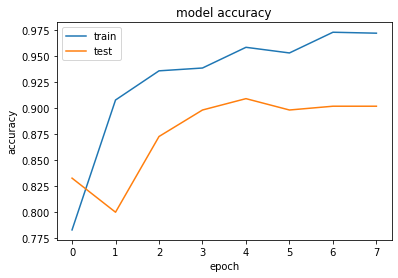

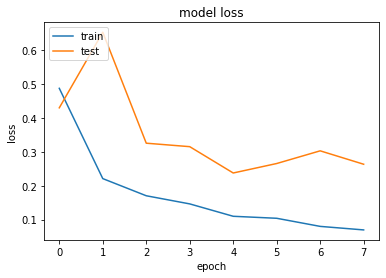

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluation

In [ ]:
#Categories
print(train_generator.class_indices)

{'mask': 0, 'nomask': 1}


In [ ]:
os.path.join(drive_path, 'Test Images','lenny_mask1.jpg')
!ls '/content/gdrive/My Drive/Msc CI/Sem 3/Computer Vision Handshake/Presentations & Projects/Image Classification/Spot The Mask/Data/Test Images'

0.jpg		   2.jpg	   mask181.jpg	nomask181.jpg
1_0_anhu_0190.jpg  3.png	   mask182.jpg	nomask182.jpg
1_0_anhu_0191.jpg  is_nomask1.jpg  mask1.jpg	nomask1.jpg
1_0_anhu_0192.jpg  is_nomask1.png  mask2.jpg	nomask2.jpg


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

img = load_img(os.path.join(drive_path, 'Test Images','mask1.jpg'), target_size=(IMAGE_SIZE, IMAGE_SIZE))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
print(img_array.shape)
predictions = model.predict(img_array)
predicted_probabilities = predictions.max(1)
print("predicted prob", predicted_probabilities)
print(predictions)
score = predictions[0]
print(score)
# print(
#     "This image is %.2f percent no mask and %.2f percent mask."
#     % (100 * (1 - score), 100 * score)
# )1

(1, 224, 224, 3)
predicted prob [0.81557286]
[[0.81557286 0.18442714]]
[0.81557286 0.18442714]


## Export model

In [ ]:
# Tensorflow Lite.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('mobilenet_tfl.tflite', 'wb') as f:
  f.write(tflite_model)

# Normal sized model
model.save('mobilenet_normal.h5')

INFO:tensorflow:Assets written to: /tmp/tmpo381084q/assets


In [ ]:
from google.colab import files
files.download('mobilenet_tfl.tflite')
files.download('mobilenet_normal.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Summary
Explored using VGG16 and Mobile Net. VGG16 was 85mb. MobileNet was 19mb and MobileNetV2 10mb. VGG16 full model was 140mb. Reduction by a magnitude of 14.

## Open Items
- Review Distribution of images by gender or colour or age group to evaluate fairness
- Pre-processing - explore images further to determine action. Blurred?